<a href="https://colab.research.google.com/github/Ehtisham1053/dimensionality-reduction-algorithms/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA manual implementation using the OOP
In this example we use the python oop to implement all the steps of the pca

Enter the number of PCA components: 30
Explained Variance Ratio:
[0.01027841 0.01008781 0.00996032 0.00970239 0.00959863 0.00953432
 0.00946069 0.00936773 0.00923924 0.00908805 0.00903268 0.0089713
 0.00893974 0.00875369 0.00873644 0.00868067 0.00855673 0.00849413
 0.0084377  0.00838526 0.00829948 0.00822603 0.00817759 0.00806882
 0.00804069 0.00799483 0.00790502 0.00782587 0.00776512 0.00771338]
the accuracy of the model is -0.03728141184721512
Mean Squared Error: 0.08157063411920379


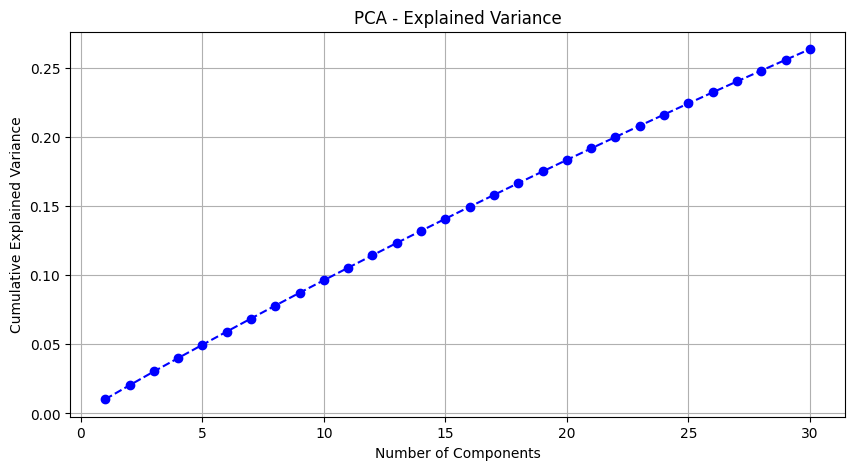

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

class PCA_Manual:
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean = None
        self.eigenvectors = None
        self.explained_variance_ratio = None

    def fit(self, X):
        # Step 1: Standardization
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Step 2: Compute Covariance Matrix
        cov_matrix = np.cov(X_scaled, rowvar=False)

        # Step 3: Compute Eigenvalues & Eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # Step 4: Sort Eigenvalues & Eigenvectors
        sorted_indices = np.argsort(eigenvalues)[::-1]
        self.eigenvectors = eigenvectors[:, sorted_indices]
        self.explained_variance_ratio = eigenvalues[sorted_indices] / np.sum(eigenvalues)

        print("Explained Variance Ratio:")
        print(self.explained_variance_ratio[:self.n_components])

    def transform(self, X):
        # Apply PCA Transformation
        return np.dot(X, self.eigenvectors[:, :self.n_components])

# Step 1: Generate Synthetic Data
np.random.seed(42)
num_samples = 1000
num_features = 200
X = np.random.rand(num_samples, num_features)

y = np.random.rand(num_samples)  # Target variable

# Convert to DataFrame
df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, num_features+1)])

# Ask user for PCA components
n_components = int(input("Enter the number of PCA components: "))

# Step 2: Apply PCA
pca = PCA_Manual(n_components=n_components)
pca.fit(df)
X_pca = pca.transform(df)

# Convert PCA output to DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC_{i+1}' for i in range(n_components)])

# Step 3: Train a Regression Model
X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, test_size=0.2, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
# import the r2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"the accuracy of the model is {r2}")
print(f"Mean Squared Error: {mse}")

# Step 4: Visualize Explained Variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, n_components+1), np.cumsum(pca.explained_variance_ratio[:n_components]), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid()
plt.show()

#Explained Variance in PCA
In Principal Component Analysis (PCA), explained variance refers to the proportion of the dataset's total variance that each principal component captures. It helps determine how much information is retained when reducing the dimensionality of data. The higher the explained variance of a component, the more significant it is in preserving the dataset’s structure.

* Example
Consider a dataset with 200 features. When applying PCA, the first few principal components (PCs) might explain most of the variance. For example:

Principal Component	Explained Variance (%)
PC1	25%
PC2	18%
PC3	12%
PC4	8%
PC5	5%
...	...
In this case, the first five components already capture 68% of the total variance, meaning that instead of using 200 features, we can reduce the dataset to just 5 components while retaining most of the information.

By plotting cumulative explained variance, we can decide the optimal number of components to keep. If 95% of the variance is explained by the first 50 components, we can reduce our dataset from 200 to 50 features, improving computational efficiency without significant information loss.

#PCA using sklearn class (implementation on MNIST dataset)

PCA Components: 10, Accuracy: 0.8016
PCA Components: 20, Accuracy: 0.8696
PCA Components: 50, Accuracy: 0.9065
PCA Components: 100, Accuracy: 0.9173
PCA Components: 200, Accuracy: 0.9234
PCA Components: 300, Accuracy: 0.9219
PCA Components: 400, Accuracy: 0.9212
PCA Components: 500, Accuracy: 0.9205
PCA Components: 600, Accuracy: 0.9178
PCA Components: 700, Accuracy: 0.9171


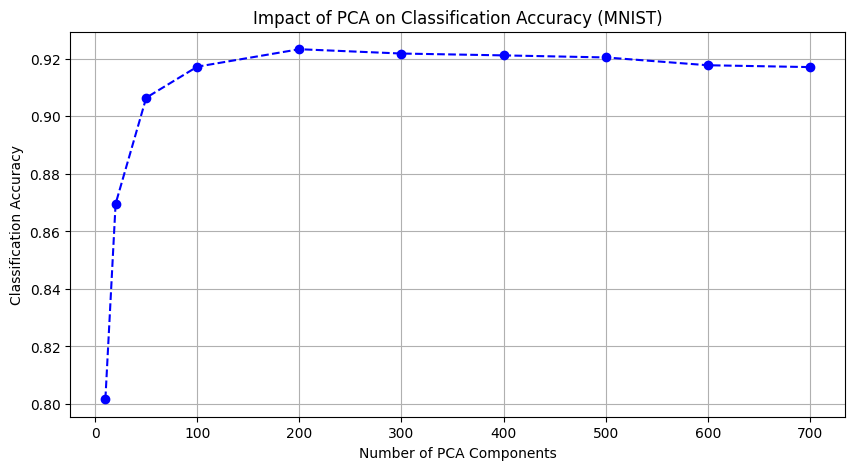

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


num_components = [10, 20, 50, 100, 200, 300, 400, 500, 600, 700]  # Different PCA component levels
accuracy_scores = []

for n in num_components:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)


    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train_pca, y_train)


    y_pred = clf.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)
    print(f"PCA Components: {n}, Accuracy: {acc:.4f}")


plt.figure(figsize=(10, 5))
plt.plot(num_components, accuracy_scores, marker='o', linestyle='--', color='b')
plt.xlabel("Number of PCA Components")
plt.ylabel("Classification Accuracy")
plt.title("Impact of PCA on Classification Accuracy (MNIST)")
plt.grid()
plt.show()


#PCA and Dimensionality Reduction
Principal Component Analysis (PCA) is used to reduce the dimensionality of high-dimensional data while retaining as much variance as possible. In this experiment, PCA was applied to the MNIST handwritten digit dataset (28x28 images → 784 features) to transform the data into fewer principal components before training a Logistic Regression model for classification.

#Key Insights
* Low Components (10-50) → Lower Accuracy

When using only 10 or 20 PCA components, accuracy is relatively low (80-86%).
1. This is because too much information is lost, making it harder for the model to differentiate digits.
Optimal Components (100-300) → Peak Accuracy

2. Accuracy increases sharply and reaches 92.34% at 200 components, which appears to be an optimal range.
This suggests that around 200-300 components retain most of the useful variance in the dataset.
Too Many Components (>300) → No Significant Gain

3. Increasing components beyond 300 does not improve accuracy significantly.
In fact, accuracy slightly decreases (e.g., 600 components → 91.78%).
This indicates that beyond a certain point, adding more components adds noise rather than useful information.

#Conclusion
Sweet Spot: Around 100-300 PCA components provide the best balance between dimensionality reduction and accuracy.
Beyond 300: More components do not improve accuracy and may increase computation time unnecessarily.
Trade-off: PCA helps reduce training time while maintaining high classification accuracy, making it useful for large-scale datasets.